In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("newhousing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [28]:
df_ratings = df.drop(['price'], axis=1)

In [29]:
df_ratings.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [30]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int64
guestroom          545 non-null int64
basement           545 non-null int64
hotwaterheating    545 non-null int64
airconditioning    545 non-null int64
parking            545 non-null int64
prefarea           545 non-null int64
semi-furnished     545 non-null int64
unfurnished        545 non-null int64
areaperbedroom     545 non-null float64
bbratio            545 non-null float64
dtypes: float64(2), int64(13)
memory usage: 63.9 KB


In [31]:
#df_cont = df_ratings[['area','areaperbedroom','bbratio']]
#normalized_df=(df_cont-df_cont.mean())/df_cont.std()
#df_ratings = df_ratings.drop(['area','areaperbedroom','bbratio'], 1)
#df_ratings = pd.concat([df_ratings,normalized_df],axis=1)
#df_ratings.head()

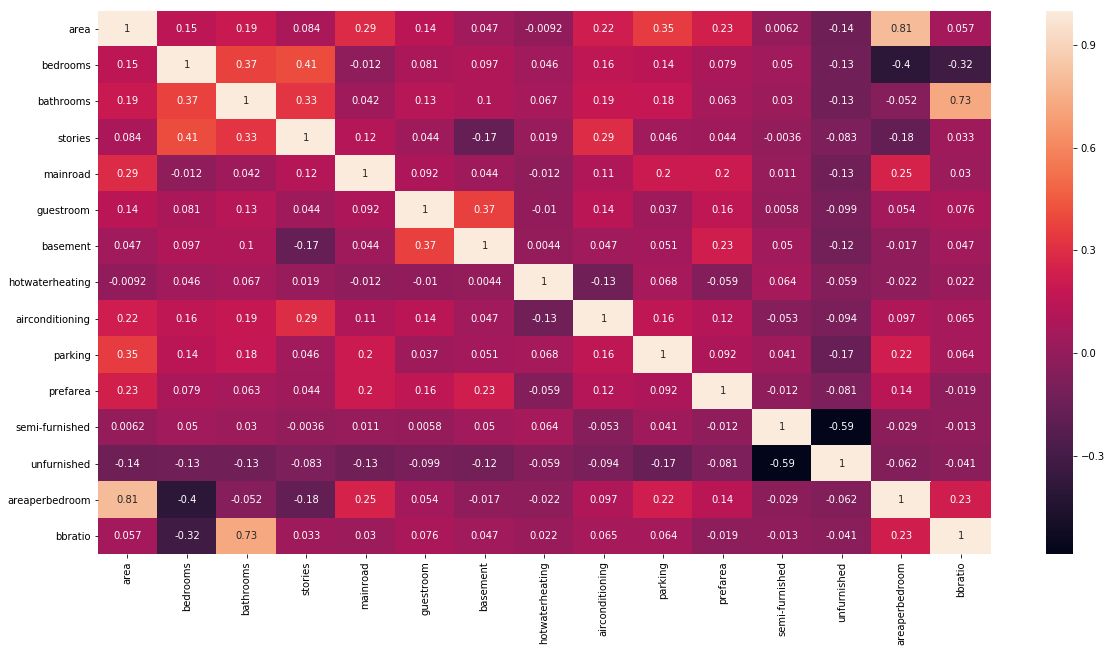

In [32]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_ratings.corr(),annot = True)

In [9]:
# Retrieve the (i,j) index for which matrix has maximum value
#ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
#print("ij_max",ij_max)
#print("Maximum correlation :",corrmat_diag_zero[ij_max])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df)
df = pd.DataFrame(scaler.transform(df),columns=df.columns)
# Putting feature variable to X
X = df.drop(['price'], axis=1)

# Putting response variable to y
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [58]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X_train)

#X_train_new = scaler.transform(X_train)
#X_test_new = scaler.transform(X_test)
#y_train_new = scaler.transform(pd.DataFrame(y_train))

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print mse
#format(val, '.2f')

0.34709785660424625
